In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [32]:
df=pd.read_csv("ChocolateSales.csv")

# Column 	Description
Date 	The transaction date of the chocolate sale.
Product Name 	Name of the chocolate product sold.
Category 	Type of chocolate (Dark, Milk, White).
Quantity Sold 	Number of chocolate units sold in the transaction.
Revenue 	Total revenue generated from the sale.
Customer Segment 	Type of customer (Retail, Wholesale).
Location 	Sales region or store location where the transaction took place.

In [33]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [34]:
df.tail()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384
1093,Karlen McCaffrey,India,70% Dark Bites,23-May-22,"$5,075",344


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [36]:
df.describe()

,Boxes Shipped
count,1094.000000
mean,161.797989
std,121.544145
min,1.000000
25%,70.000000
50%,135.000000
75%,228.750000
max,709.000000


In [37]:
df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [38]:
df.duplicated().sum()

0

In [39]:
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384


In [40]:
df["Amount"] = df["Amount"].str.replace(",", "") 
df["Amount"] = df["Amount"].str.replace("$", "")  
df["Amount"] = pd.to_numeric(df["Amount"], errors='coerce')

In [41]:
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320,180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685,184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,4410,323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,6559,119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,2086,384


In [43]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

In [44]:
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685,184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410,323
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559,119
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574,217
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086,384


array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Amount'}>],
       [<AxesSubplot:title={'center':'Boxes Shipped'}>, <AxesSubplot:>]],
      dtype=object)

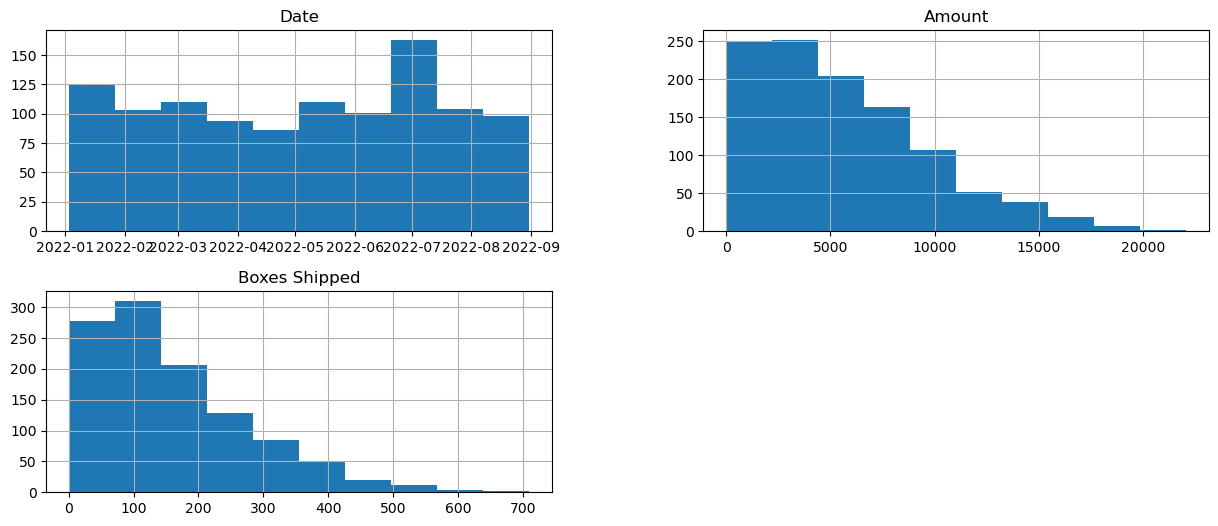

In [54]:
df.hist(figsize=(15,6))

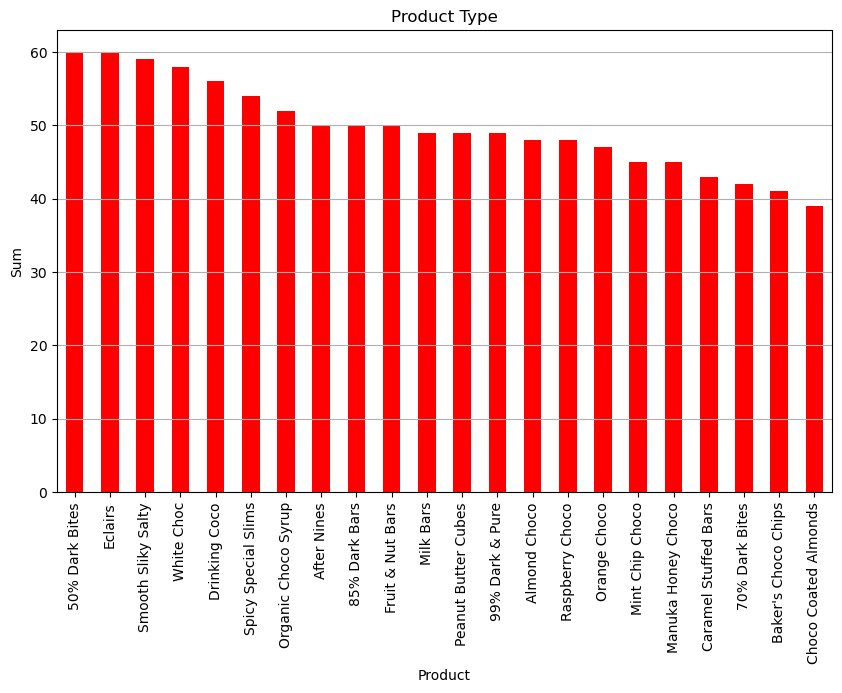

In [50]:
plt.figure(figsize=(10,6))
product=df["Product"].value_counts()
product.plot(kind="bar", color="red")
plt.title("Product Type")
plt.xlabel("Product")
plt.ylabel("Sum")
plt.grid(axis="y")
plt.show()

# Most selling product

In [46]:
product_filt=df.groupby("Product")["Amount"].sum().sort_values(ascending=False)
product_filt

Product
Smooth Sliky Salty      349692
50% Dark Bites          341712
White Choc              329147
Peanut Butter Cubes     324842
Eclairs                 312445
99% Dark & Pure         299796
85% Dark Bars           299229
Organic Choco Syrup     294700
Spicy Special Slims     293454
Mint Chip Choco         283969
Almond Choco            277536
Manuka Honey Choco      275541
Milk Bars               269248
Raspberry Choco         264740
After Nines             261331
Fruit & Nut Bars        259147
Drinking Coco           256655
Orange Choco            256144
Baker's Choco Chips     249613
Choco Coated Almonds    241486
Caramel Stuffed Bars    231588
70% Dark Bites          211610
Name: Amount, dtype: int64

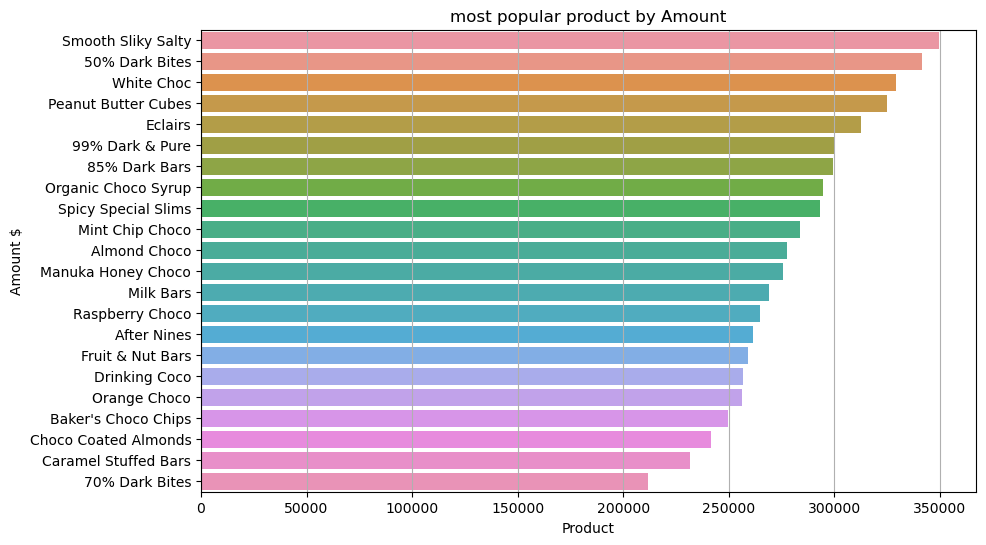

In [47]:
plt.figure(figsize=(10,6))
sbn.barplot(data=df , x=product_filt.values , y=product_filt.index)
plt.title("most popular product by Amount")
plt.xlabel("Product")
plt.ylabel("Amount $")
plt.grid(axis="x")
plt.show()

# Most selling product by shipped box

In [48]:
product_filt2=df.groupby("Product")["Boxes Shipped"].sum().sort_values(ascending=False)
product_filt2

Product
50% Dark Bites          9792
Smooth Sliky Salty      8810
Eclairs                 8757
Caramel Stuffed Bars    8717
Spicy Special Slims     8685
Drinking Coco           8660
Milk Bars               8330
Peanut Butter Cubes     8304
After Nines             8257
White Choc              8240
Mint Chip Choco         8207
99% Dark & Pure         8127
70% Dark Bites          8015
85% Dark Bars           7793
Manuka Honey Choco      7781
Organic Choco Syrup     7749
Fruit & Nut Bars        7738
Orange Choco            7732
Raspberry Choco         7115
Baker's Choco Chips     6998
Almond Choco            6736
Choco Coated Almonds    6464
Name: Boxes Shipped, dtype: int64

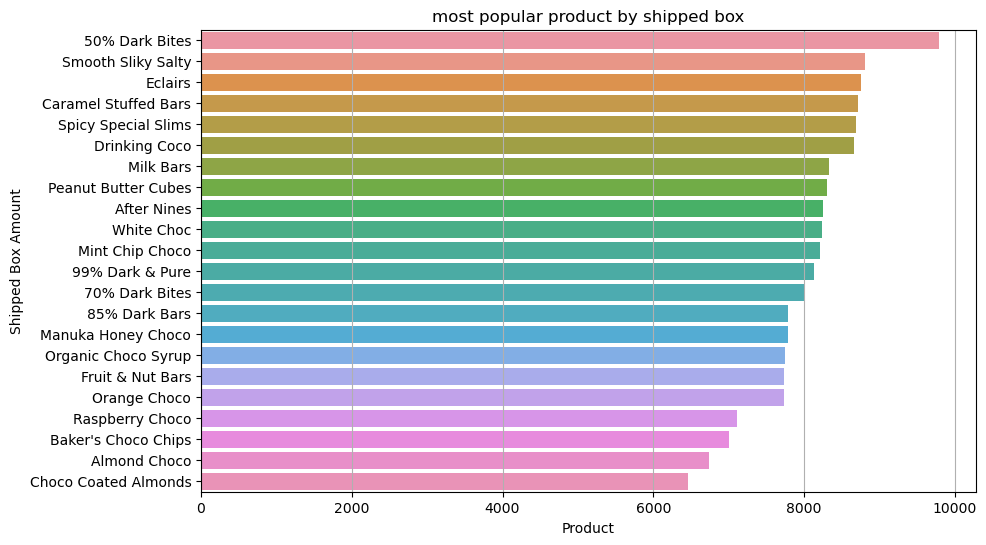

In [58]:
plt.figure(figsize=(10,6))
sbn.barplot(data=df, x=product_filt2.values, y=product_filt2.index)
plt.title("most popular product by shipped box")
plt.xlabel("Product")
plt.ylabel("Shipped Box Amount")
plt.grid(axis="x")
plt.show()

In [59]:
df.columns


Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')

# Sales by Countrys

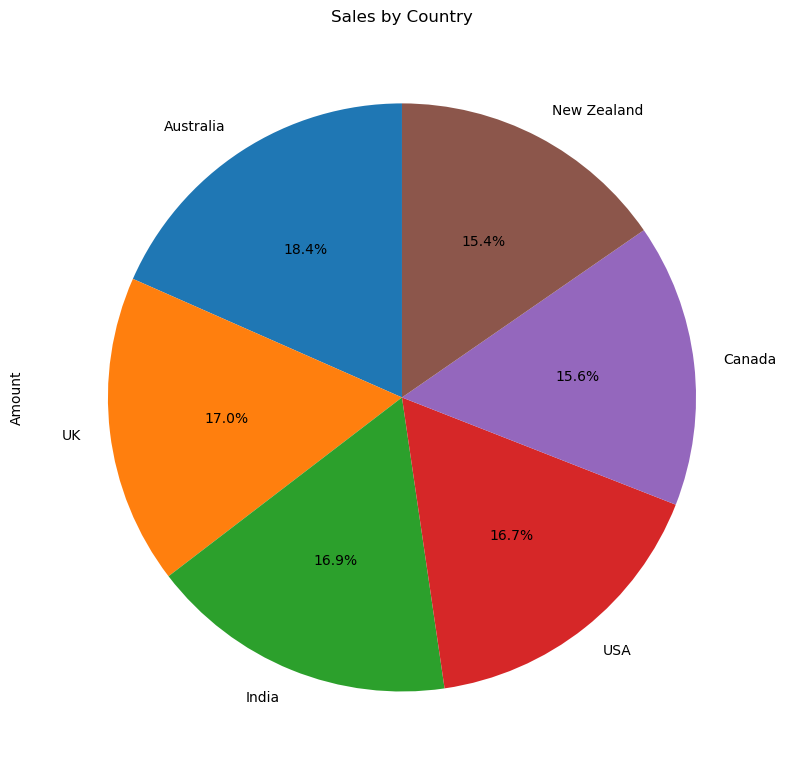

In [62]:
country_sales=df.groupby("Country")["Amount"].sum().sort_values(ascending=False)
country_sales.plot(kind='pie', 
                   autopct='%1.1f%%',   
                   figsize=(8, 8),      
                   startangle=90,      
                   legend=False)        
plt.title("Sales by Country")  
plt.tight_layout()  
plt.show()

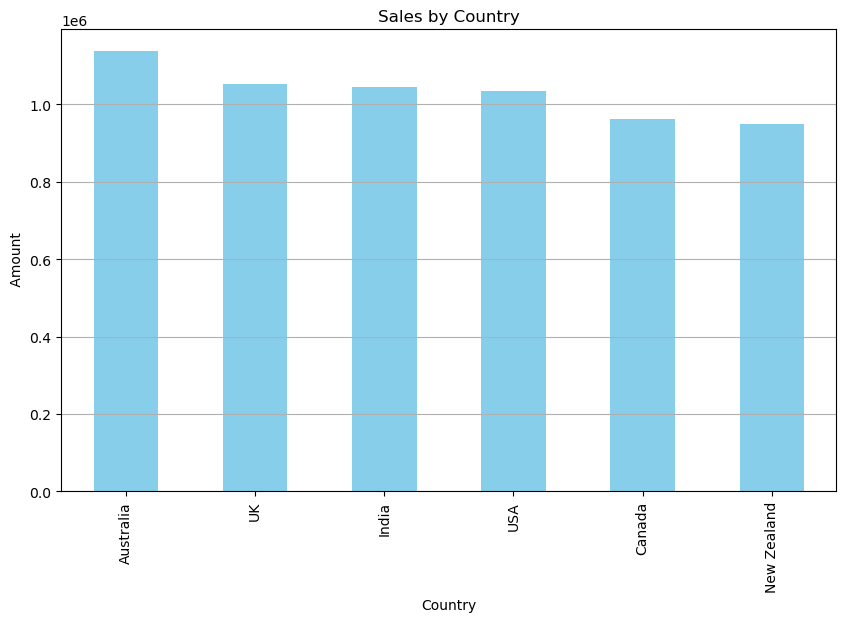

In [64]:
plt.figure(figsize=(10,6))
country_sales.plot(kind="bar", color="skyblue")
plt.title("Sales by Country")
plt.xlabel("Country")
plt.ylabel(" Amount")
plt.grid(axis="y")
plt.show()

In [65]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685,184


# Best Sellers (Sales Person)

In [67]:
person=df["Sales Person"].value_counts()
person

Kelci Walkden          54
Brien Boise            53
Van Tuxwell            51
Beverie Moffet         50
Dennison Crosswaite    49
Oby Sorrel             49
Ches Bonnell           48
Karlen McCaffrey       47
Gigi Bohling           47
Curtice Advani         46
Kaine Padly            45
Madelene Upcott        45
Marney O'Breen         45
Barr Faughny           43
Jehu Rudeforth         43
Roddy Speechley        43
Gunar Cockshoot        43
Mallorie Waber         41
Jan Morforth           39
Andria Kimpton         39
Husein Augar           38
Dotty Strutley         36
Wilone O'Kielt         34
Rafaelita Blaksland    34
Camilla Castle         32
Name: Sales Person, dtype: int64

Text(0.5, 1.0, 'Sales by Sales Person')

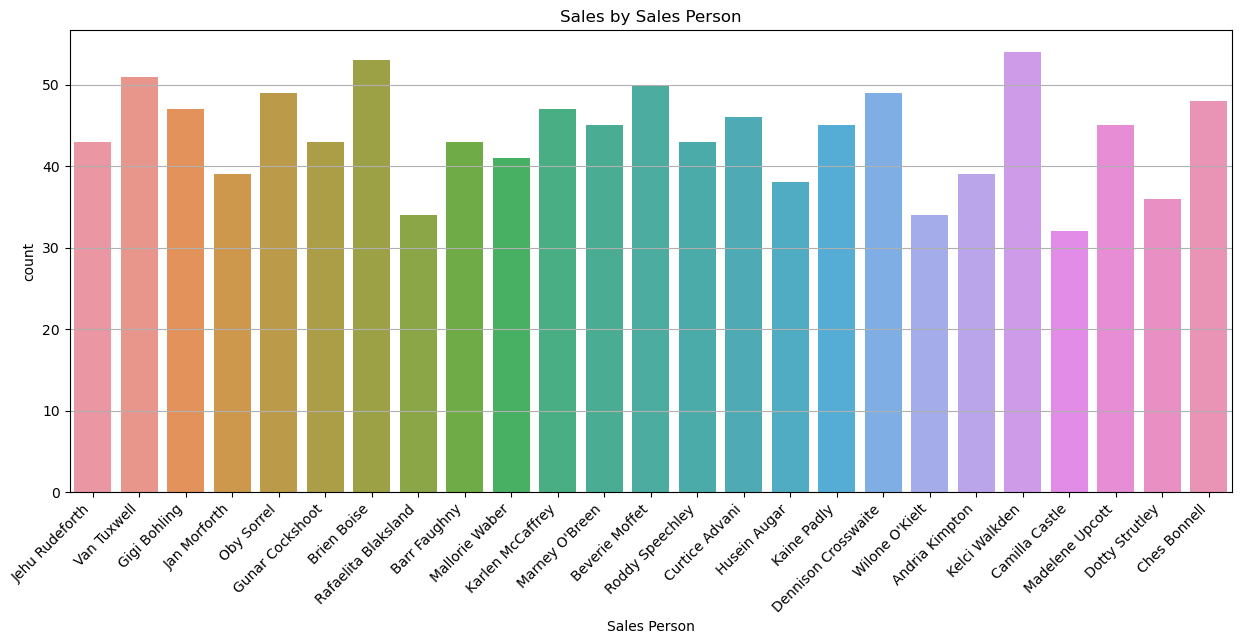

In [73]:
plt.figure(figsize=(15,6))
sbn.countplot(x="Sales Person" , data=df)
plt.xticks(rotation=45, ha='right')
plt.grid(axis="y")
plt.title("Sales by Sales Person")

# Sales by Month

In [79]:
df_years = pd.DataFrame()
df['year'] = df['Date'].dt.year
print(f"The Year ranges from {df[df['year'] > 1950]['year'].min()} to {df['year'].max()}.")

The Year ranges from 2022 to 2022.


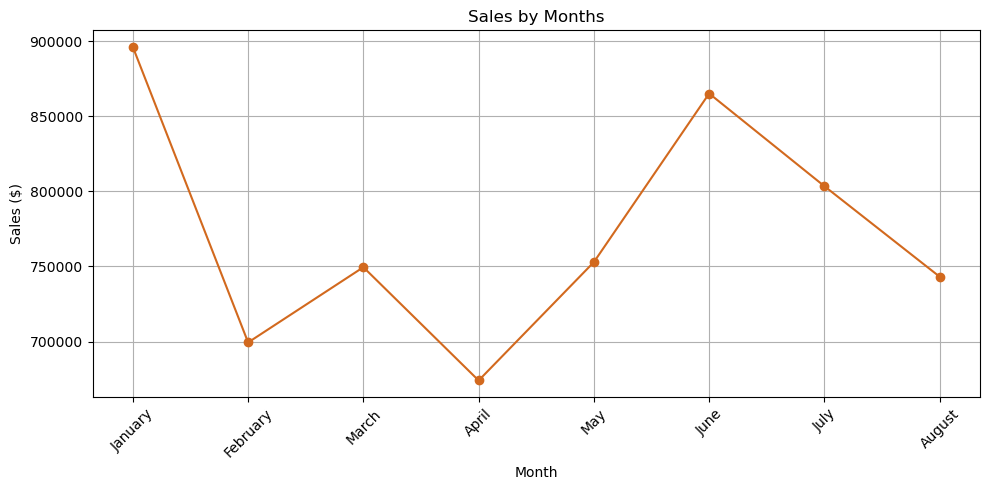

In [82]:
df['Month'] = df['Date'].dt.month_name()


month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = df.groupby('Month')['Amount'].sum().reindex(month_order)


plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line', marker='o', color='#D2691E')
plt.title('Sales by Months')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Box Distribution by Product

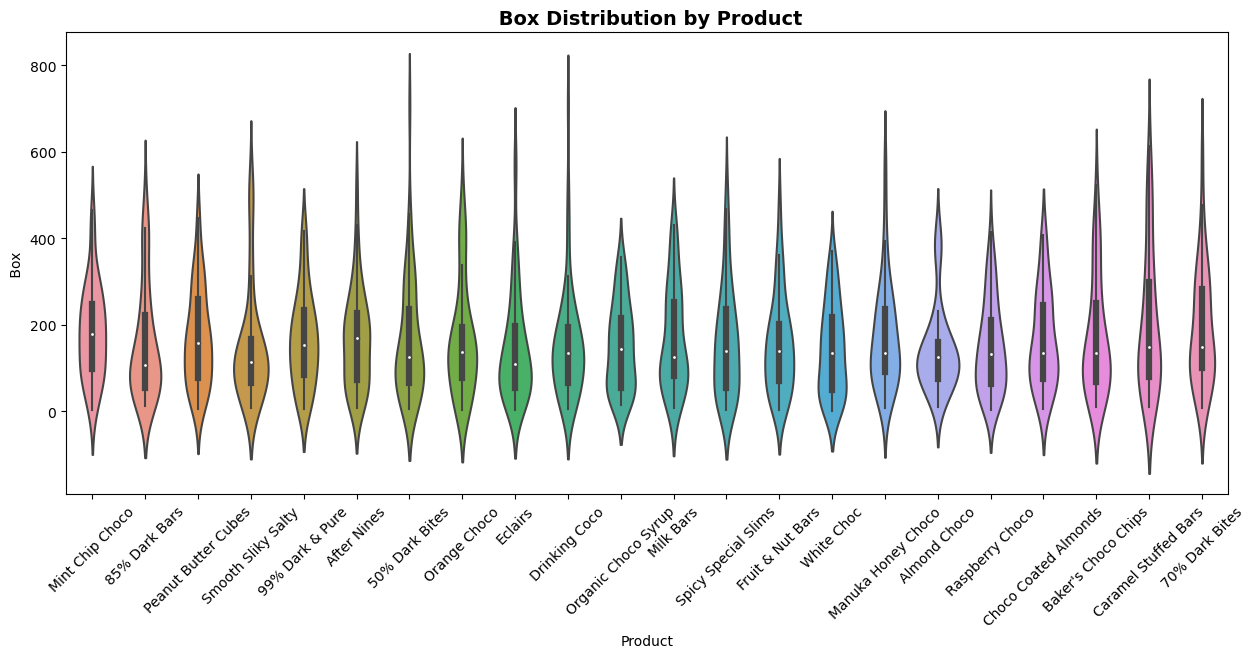

In [87]:
plt.figure(figsize=(15,6))
sbn.violinplot(data=df, x='Product', y='Boxes Shipped')
plt.title(' Box Distribution by Product', fontsize=14, fontweight='bold')
plt.xlabel('Product')
plt.ylabel(' Box ')
plt.xticks(rotation=45)
plt.show()